# Imports

In [1]:
import sys
sys.path.append('../ClusterPlot')
sys.path.append('./utils')
import pandas as pd
import numpy as np
import seaborn as sns
# %matplotlib notebook  # Uncomment for zoom in in 3D plot for paper

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from sklearn.metrics import pairwise_distances
from sklearn.cluster import Birch

from DataSetFactory import DataSetFactory
from ClusterPlot import ClusterPlot

In [2]:
RANDOM_STATE = 42

In [3]:
ds = DataSetFactory.get_dataset('cross7', random_state=RANDOM_STATE, sample=None, is_subset=False)

# 3D Plot

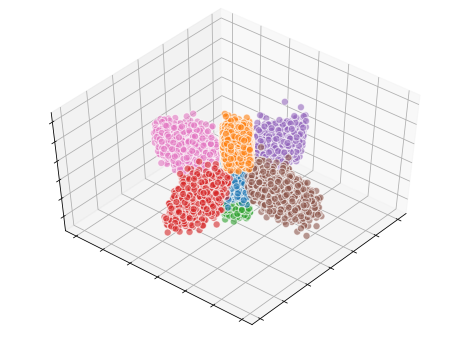

In [4]:
# %matplotlib notebook
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for l in ds.df[ds.label_col].unique():
    xs = ds.df[ds.df[ds.label_col] == l]['X']
    ys = ds.df[ds.df[ds.label_col] == l]['Y']
    zs = ds.df[ds.df[ds.label_col] == l]['Z']
    ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# remove ticks
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)

ax.view_init(elev=50, azim=40)

plt.show()

In [5]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values

# Cluster Plots

In [10]:
blobs_cp = ClusterPlot(class_to_label=ds.class_to_label,
                      show_fig=True,
                      save_fig=False,
                      random_state=RANDOM_STATE,
                      birch_threshold=0.42,
                      alpha=0.2,
                      douglas_peucker_tolerance=0.5,
                      smooth_iter=3,
                      learning_rate=0.1,
                      show_label_level_plots=False,
                      show_loss_plot=False,
                      n_iter=1,
                      batch_size=0)
print(blobs_cp)

ClusterPlot
addr:@e06f48
verbose=20
logger=<Logger ClusterPlot-4763 (INFO)>
n_components=2
anchors_method='birch'
n_intra_anchors=None
birch_threshold=0.42
birch_branching_factor=None
dim_reduction_algo='umap'
supervised=False
umap_n_neighbors=15
umap_min_dist=1
tsne_perplexity=30.0
reduce_all_points=False
uniform_points_per='anchor'
k=20
proximity_k=3
self_relation=False
radius_q=None
do_relaxation=True
top_greedy=1
magnitude_step=False
n_iter=1
batch_size=0
stop_criteria=1e-05
loss_func=<function ClusterPlot._l_inf_loss at 0x0000027A263528B8>
loss='Linf'
only_inter_relations=False
learning_rate=0.1
mask_sparse_subcluster=None
random_points_method='voronoi'
class_to_label={0: 'Poly0', 1: 'Poly1', 2: 'Poly2', 3: 'Poly3', 4: 'Poly4', 5: 'Poly5', 6: 'Poly6'}
random_state=42
n_jobs=None
dataset='default'
show_fig=True
save_fig=False
figsize=(21, 15)
do_animation=False
use_spline=False
alpha=0.2
remove_outliers_k=None
douglas_peucker_tolerance=0.5
smooth_iter=3
skip_polygons_with_area=0.01

2020-05-16 13:45:25,075 - ClusterPlot-4763 - INFO - finding intra class anchors using birch
2020-05-16 13:45:25,075 - ClusterPlot-4763 - INFO - finding intra class anchors using birch
2020-05-16 13:45:28,258 - ClusterPlot-4763 - INFO - UnSupervised Dim Reduction
2020-05-16 13:45:28,258 - ClusterPlot-4763 - INFO - UnSupervised Dim Reduction
2020-05-16 13:45:28,262 - ClusterPlot-4763 - INFO - Dim Reduction only anchors
2020-05-16 13:45:28,262 - ClusterPlot-4763 - INFO - Dim Reduction only anchors
2020-05-16 13:45:29,219 - ClusterPlot-4763 - INFO - Dim Reduction only anchors - generate random points in low dim per anchor
2020-05-16 13:45:29,219 - ClusterPlot-4763 - INFO - Dim Reduction only anchors - generate random points in low dim per anchor
100%|████████████████████████████████████████████████████████████████████████████| 14384/14384 [04:01<00:00, 59.58it/s]
2020-05-16 13:49:34,216 - ClusterPlot-4763 - INFO - Starting iteration 1 loss = 0.8421052631578947
2020-05-16 13:49:34,216 - Clu

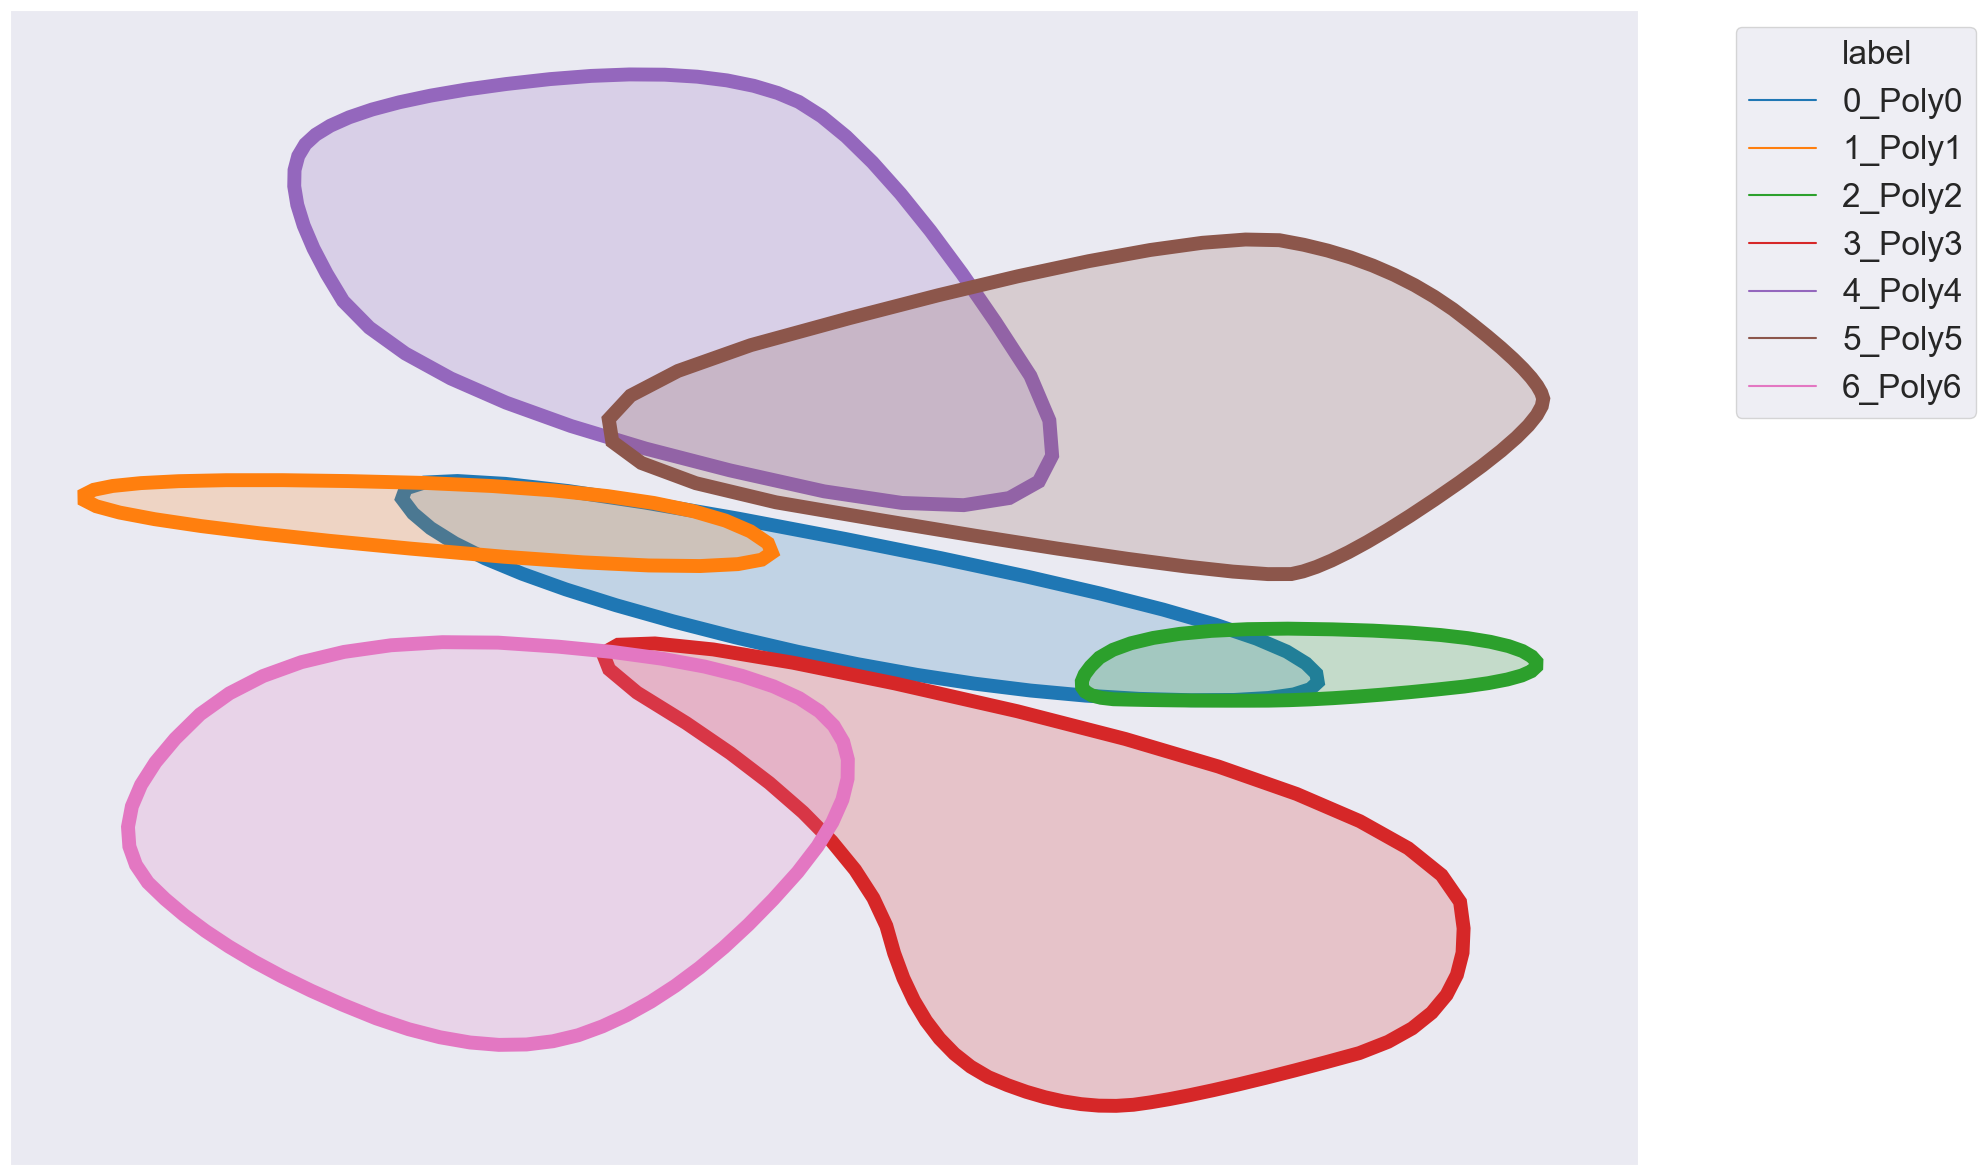

In [11]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)